In [291]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [292]:
x_,y_ = make_blobs(n_samples=1000,n_features=2,centers=2)

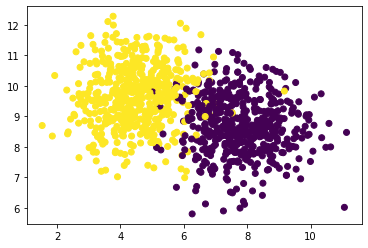

In [293]:
plt.scatter(x_[:,0],x_[:,1],c=y_)

In [294]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=42)

#### Problem :
make_classification may not always return linearly separable dataset

In [295]:
#X,y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_repeated=0)

In [296]:
#plt.scatter(X[:,0],X[:,1],c=y)

In [313]:
class perceptron:
    def __init__(self,n_iter=10000, learning_rate= 0.01,fit_intercept = True):
        self.n_iter = n_iter
        self.lr = learning_rate
        self.m = None
        self.n = None
        self.fit_intercept = fit_intercept
    
    def fit(self,X,y):
        # Dimensions of the data
        (self.n, self.m) = X.shape
        
        # Useful data for plotting
        self.x1_min, self.x1_max = min(X[:,0]), max(X[:,0])
        self.x2_min, self.x2_max = min(X[:,1]), max(X[:,1])
        
        # Fitting intercept 
        if self.fit_intercept == True:
            X = np.hstack((np.ones((self.n,1),dtype = X.dtype),X))
            self.W = 0.01 * np.random.randn(1,self.m + 1)
        else:
            self.W = 0.01 * np.random.randn(1,self.m)

        # Learning the weights
        for _ in range(self.n_iter):
            for i in range(1,self.n):
                if np.dot(X[i],self.W.T) > 0:
                    if y[i] != 1:
                        self.W -= self.lr * X[i] 
                else:
                    if y[i] != 0:
                        self.W += self.lr * X[i]
        
        self.W = self.W.flatten()
        
    
    def predict(self,X):
        y_pred = []
        
        # Fitting intercept
        n = X.shape[0] 
        if self.fit_intercept == True:
            X = np.hstack((np.ones((n,1),dtype = X.dtype),X))
            
        #predict sing instances
        for i in range(len(X)):
            if np.dot(X[i],self.W.T) > 0:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return y_pred
    
    def _plot(self,X,y_pred):
        
        # Retrieve the model parameters.
        b =  self.W[0]
        w1, w2 = self.W[1], self.W[2]
        
        # Calculate the intercept and gradient of the decision boundary.
        c = -b/w2
        m = -w1/w2

        # Plot the data and the classification with the decision boundary.
        xmin, xmax = self.x1_min,self.x1_max
        ymin, ymax = self.x2_min, self.x2_max

        xd = np.array([xmin, xmax])
        yd = m*xd + c
        plt.scatter(X[:,0],X[:,1],c=y_pred)
        plt.plot(xd, yd, 'k', lw=1, ls='--')
        plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
        plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
        


In [314]:
pp = perceptron()

In [315]:
pp.fit(X_train,y_train)

In [316]:
pp.W

array([ 3.76144296, -1.22946014,  0.38318628])

In [317]:
y_pred = pp.predict(X_test)

In [318]:
y_pred

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

In [319]:
accuracy_score(y_test,y_pred)

0.96

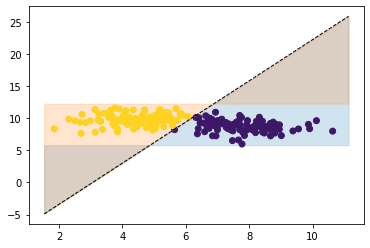

In [320]:
pp._plot(X_test,y_pred)